In [4]:
# importing required libraries

import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# To display maximum columns of dataframe on screen
pd.pandas.set_option('display.max_columns', None)

### 1.0 Importing dataset after filling missing values and encoding categorical variables

In [27]:
dataset=pd.read_csv('Travel_missing_filled_encoded.csv')
dataset.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TypeofContact_Self Enquiry,TypeofContact_Company Invited,TypeofContact_Rare,Occupation_Salaried,Occupation_Small Business,Occupation_Large Business,Occupation_Rare,Gender_Male,Gender_Female,Gender_Rare,ProductPitched_Basic,ProductPitched_Deluxe,ProductPitched_Standard,ProductPitched_Super Deluxe,ProductPitched_Rare,MaritalStatus_Married,MaritalStatus_Divorced,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_AVP,Designation_Rare
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,200002,1,37.0,Self Enquiry,1,8.0,Rare,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [3]:
# from EDA section getting continuous feature list
continuous_numerical_features=['Age', 'DurationOfPitch', 'MonthlyIncome']

### 2.0 Transforming continuous numerical features

In [17]:
#To evaluate the effect of the transformation on the variable distribution, we'll create a function 
#that takes a dataframe and a variable name as inputs and plots a histogram next to a Q-Q plot

def eval_transformation_effect_plot(in_data, in_feature):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    in_data[in_feature].hist(bins=30)
    plt.subplot(1,2,2)
    stats.probplot(in_data[in_feature], dist='norm', plot=plt)
    plt.show();

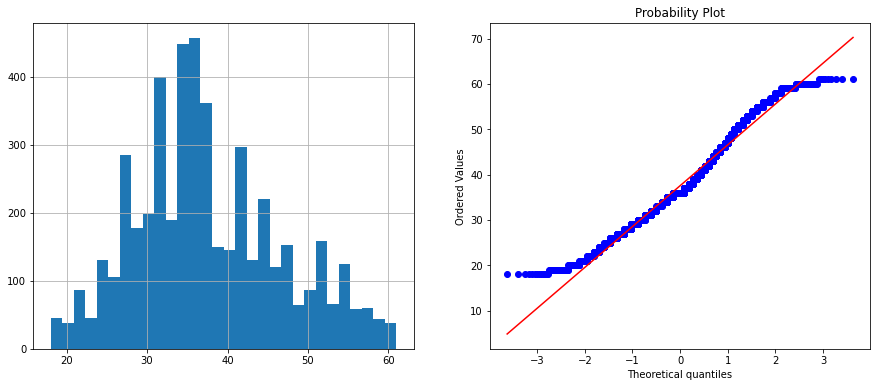

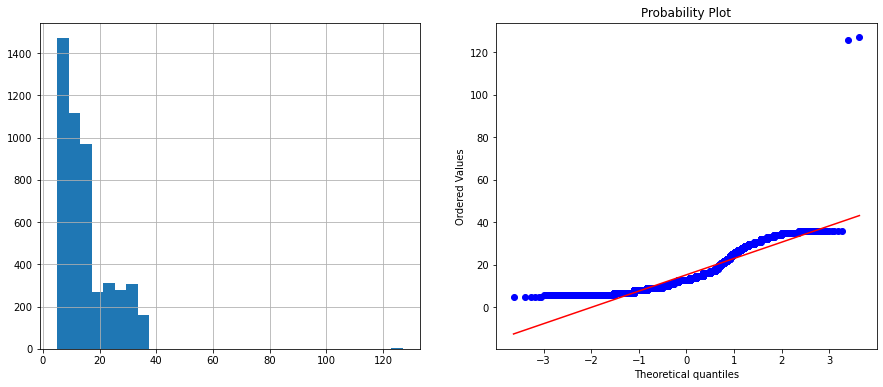

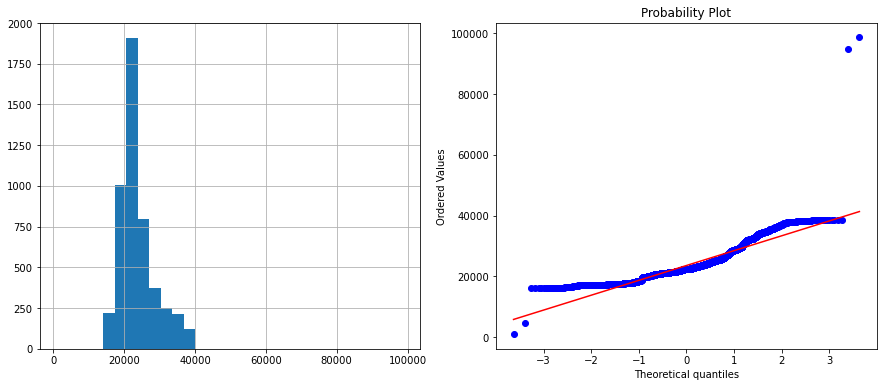

In [18]:
### lets plot the features before transforming data

for feature in continuous_numerical_features:
    eval_transformation_effect_plot(dataset, feature)

### 2.1 Logarithmic transform

1.The logarithm function is commonly used to transform variables. It has a strong effect on the shape of the variable distribution and can only be applied to positive variables. 

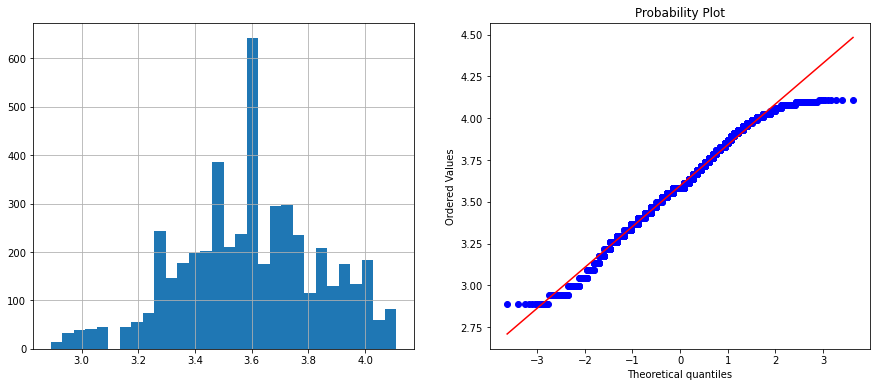

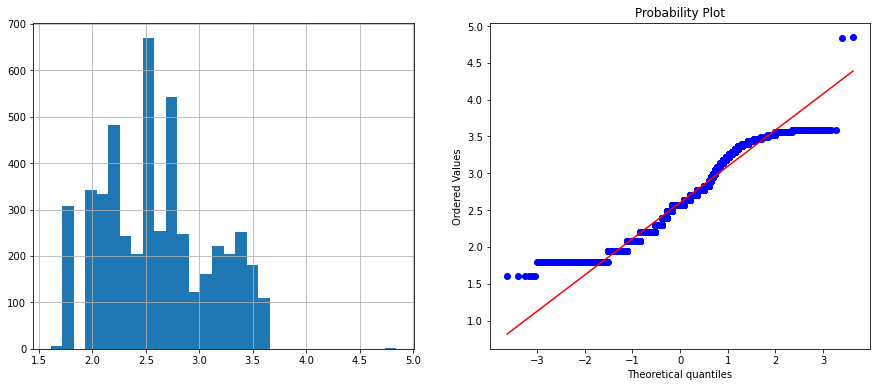

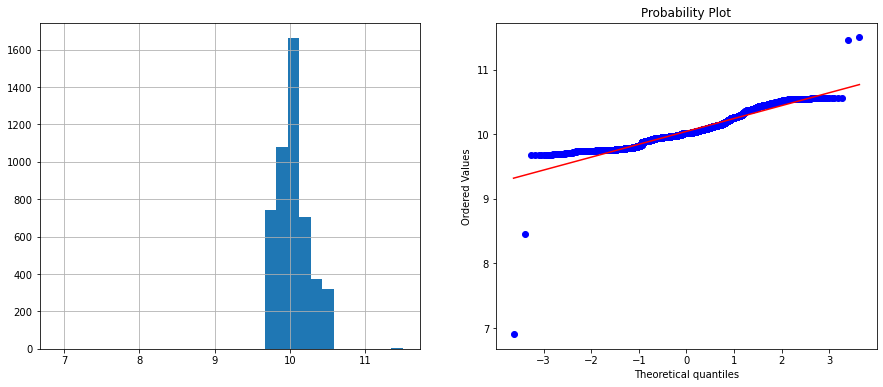

In [20]:
data1=dataset.copy()

for feature in continuous_numerical_features:
    if 0 in data1[feature].unique():
        pass
    else:
        data1[feature]=np.log(data1[feature])

### check plots after transformation
for feature in continuous_numerical_features:
    eval_transformation_effect_plot(data1, feature)

### 2.2 reciprocal function (1/x) Transform
1. The reciprocal function, defined as 1/x, is a strong transformation with a very drastic effect on the variable distribution. It isn't defined for the value 0, but it can be applied to negative numbers.

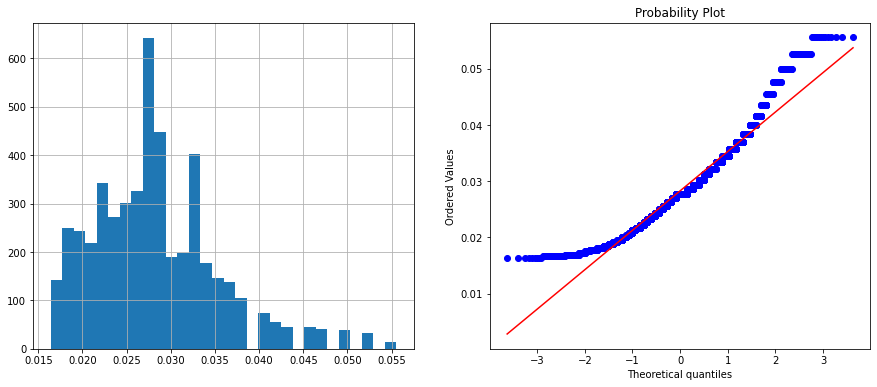

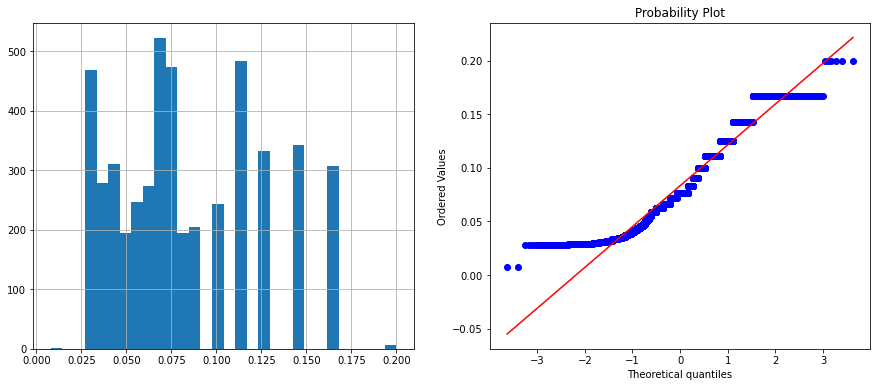

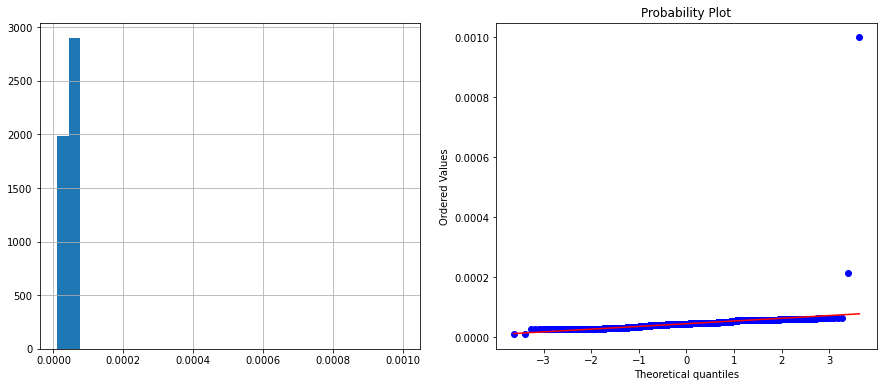

In [21]:
data1=dataset.copy()

for feature in continuous_numerical_features:
    if 0 in data1[feature].unique():
        pass
    else:
        data1[feature]=np.reciprocal(data1[feature])

### check plots after transformation
for feature in continuous_numerical_features:
    eval_transformation_effect_plot(data1, feature)

### 2.3 Square root Transform
1. The square root transformation is specific form of power transformation where the exponent is 1/2 

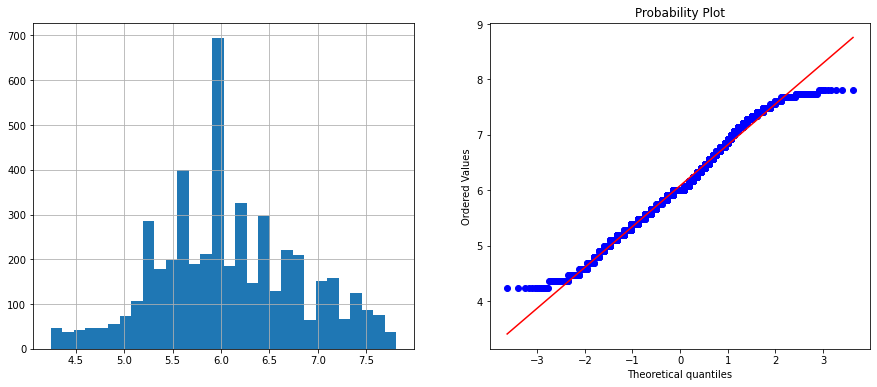

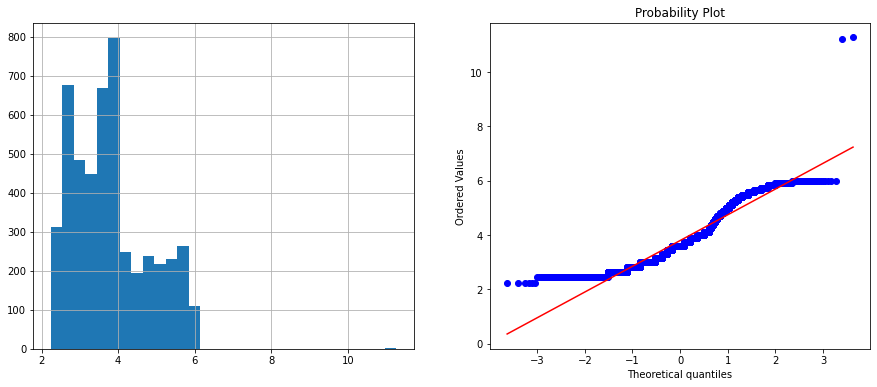

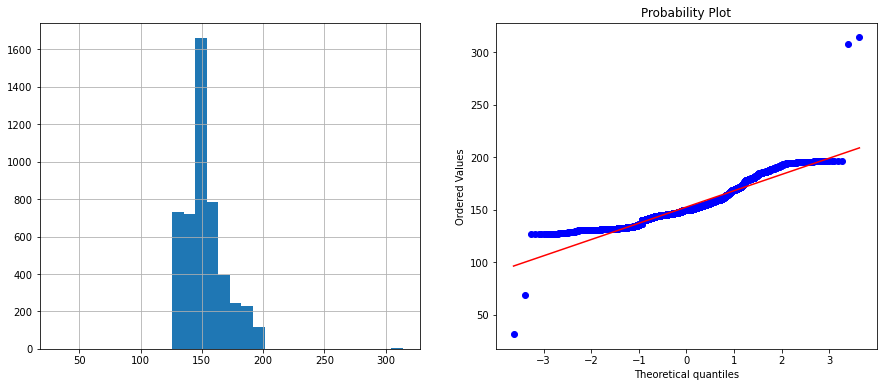

In [23]:
data1=dataset.copy()

for feature in continuous_numerical_features:
    data1[feature]=np.sqrt(data1[feature])

### check plots after transformation
for feature in continuous_numerical_features:
    eval_transformation_effect_plot(data1, feature)

### 2.4 Cube root Transform
1. The cube root transformation is specific form of power transformation where the exponent is 1/3

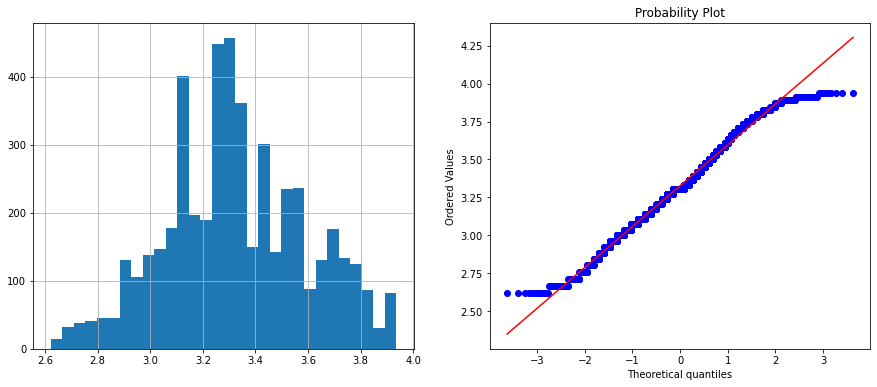

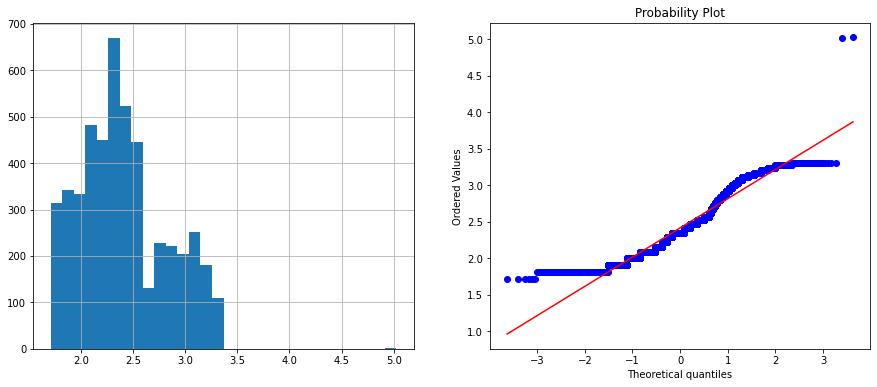

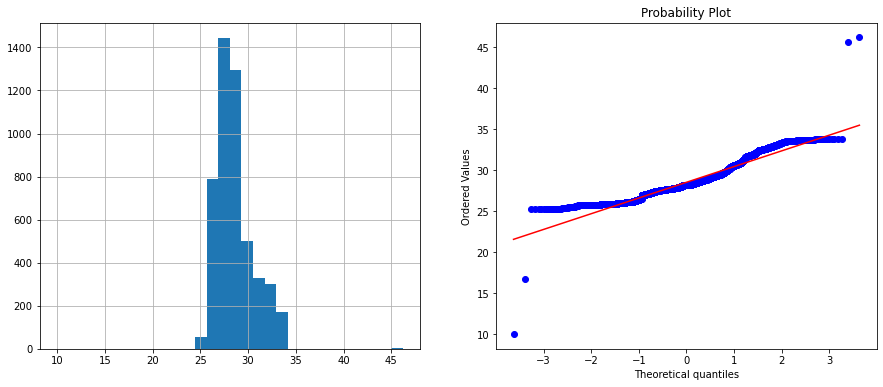

In [24]:
data1=dataset.copy()

for feature in continuous_numerical_features:
    data1[feature]=np.cbrt(data1[feature])

### check plots after transformation
for feature in continuous_numerical_features:
    eval_transformation_effect_plot(data1, feature)

### 2.5 Power transformation
1. Exponential or power functions are mathematical transformations that follow , where lambda can be any exponent. The square and cube root transformations are special cases of power transformations where lambda is 1/2 or 1/3, respectively. In practice, we try different lambdas to determine which one offers the best transformation. 

### 2.5.1 power = 0.2

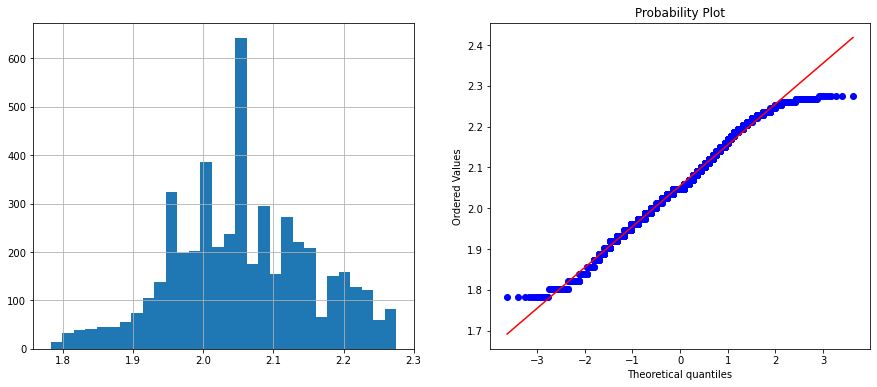

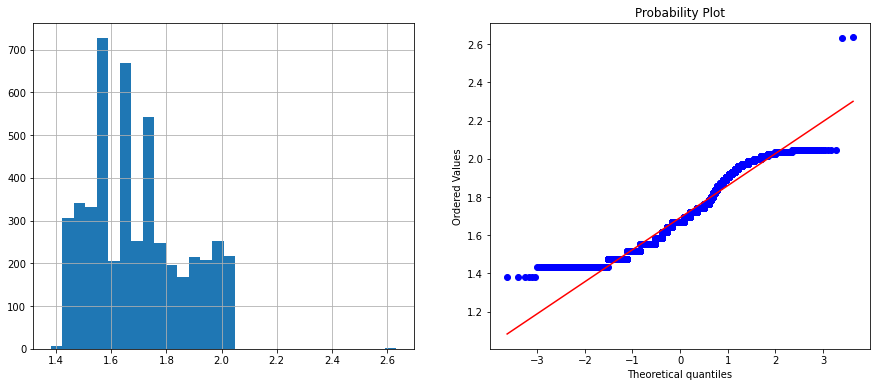

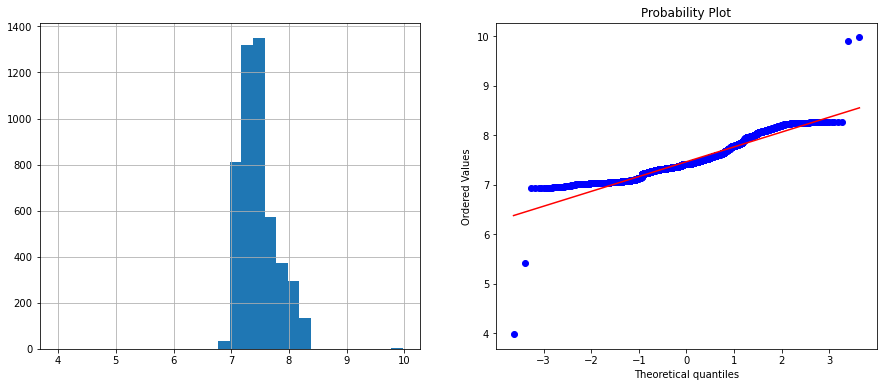

In [25]:
data1=dataset.copy()

for feature in continuous_numerical_features:
    data1[feature]=np.power(data1[feature], 0.2)

### check plots after transformation
for feature in continuous_numerical_features:
    eval_transformation_effect_plot(data1, feature)

### 2.5.2 power = 0.7

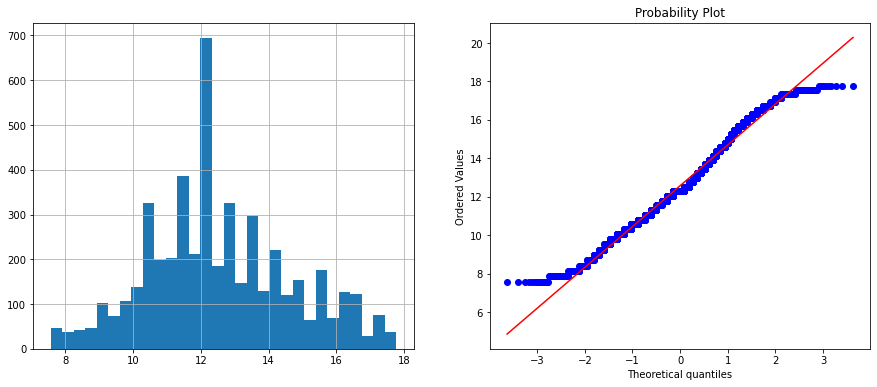

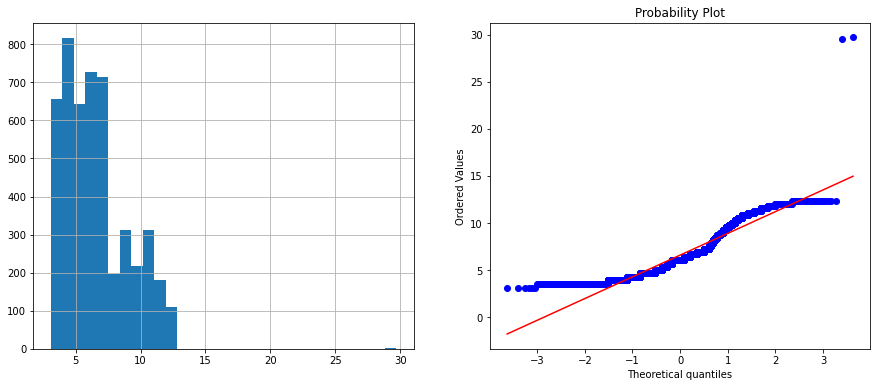

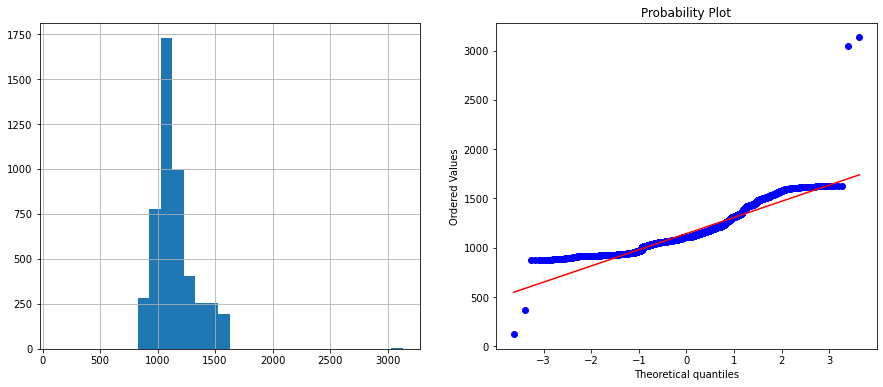

In [26]:
data1=dataset.copy()

for feature in continuous_numerical_features:
    data1[feature]=np.power(data1[feature], 0.7)

### check plots after transformation
for feature in continuous_numerical_features:
    eval_transformation_effect_plot(data1, feature)